In [11]:
import sys
import os
import glob
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
train = pd.read_csv('../processed_data/train_v2.csv')

In [10]:
train.head(3)

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,...,enviroment,structure,contact_period,max_floor,room_num,L,D,K,S,north
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,117,南東,20.01,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,...,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,7,2年間,12,1,0,0,1,0,0
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,538,NaN,16.50,5,専用トイレ／\tシャワー／\t温水洗浄便座,...,【スーパー】 1283m,2,2年間,10,1,0,0,0,0,0
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,102,南,22.05,12,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,...,【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,7,2年間,15,1,0,0,1,0,0


In [22]:
print(max(train['y']),min(train['y']))

2500000 25000


(array([5.000e+00, 1.000e+01, 2.600e+01, 9.000e+00, 4.400e+01, 3.600e+01,
        1.300e+02, 8.900e+01, 2.870e+02, 2.140e+02, 4.600e+02, 3.540e+02,
        6.540e+02, 4.200e+02, 8.860e+02, 5.530e+02, 1.032e+03, 5.610e+02,
        9.450e+02, 4.930e+02, 7.770e+02, 8.230e+02, 7.590e+02, 8.550e+02,
        7.800e+02, 8.060e+02, 8.200e+02, 8.220e+02, 6.650e+02, 7.440e+02,
        6.690e+02, 8.570e+02, 6.990e+02, 7.050e+02, 6.550e+02, 5.870e+02,
        5.130e+02, 6.220e+02, 5.380e+02, 3.940e+02, 5.530e+02, 3.910e+02,
        5.480e+02, 3.210e+02, 4.940e+02, 3.000e+02, 4.660e+02, 1.990e+02,
        3.520e+02, 1.720e+02, 3.260e+02, 1.560e+02, 3.020e+02, 2.170e+02,
        2.770e+02, 1.480e+02, 2.080e+02, 1.480e+02, 2.660e+02, 1.270e+02,
        1.450e+02, 1.460e+02, 1.790e+02, 1.020e+02, 1.520e+02, 1.470e+02,
        1.540e+02, 1.000e+02, 1.120e+02, 1.350e+02, 1.150e+02, 1.080e+02,
        8.200e+01, 9.900e+01, 1.040e+02, 7.800e+01, 6.200e+01, 6.100e+01,
        1.140e+02, 3.500e+01, 6.500e+0

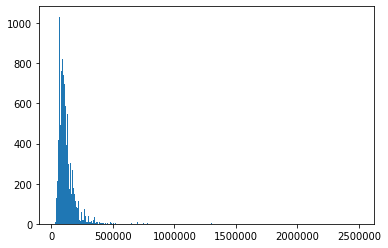

In [27]:
plt.hist(train['y'],range=(min(train['y']),max(train['y'])),bins=1000)

(array([1.2900e+02, 3.5220e+03, 1.1444e+04, 1.0883e+04, 4.0860e+03,
        1.1480e+03, 1.8600e+02, 5.6000e+01, 1.3000e+01, 3.0000e+00]),
 array([10.1266311 , 10.58714812, 11.04766514, 11.50818216, 11.96869918,
        12.4292162 , 12.88973322, 13.35025023, 13.81076725, 14.27128427,
        14.73180129]),
 <a list of 10 Patch objects>)

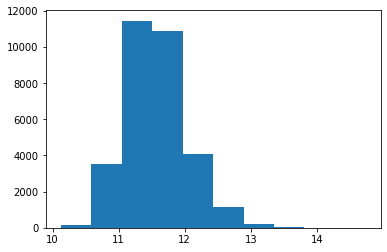

In [33]:
plt.hist(np.log(train['y']))

In [34]:
np.log(train['y'])

0        11.225243
1        11.238489
2        11.608236
3        11.918391
4        11.211820
           ...    
31465    11.289782
31466    10.905956
31467    11.736069
31468    11.492723
31469    11.302204
Name: y, Length: 31470, dtype: float64

In [36]:
np.exp(np.log(train['y']))

0         75000.0
1         76000.0
2        110000.0
3        150000.0
4         74000.0
           ...   
31465     80000.0
31466     54500.0
31467    125000.0
31468     98000.0
31469     81000.0
Name: y, Length: 31470, dtype: float64

In [31]:
train['y']

0         75000
1         76000
2        110000
3        150000
4         74000
          ...  
31465     80000
31466     54500
31467    125000
31468     98000
31469     81000
Name: y, Length: 31470, dtype: int64

### access の前処理　

- とりあえず駅から徒歩何分かについて、最短と平均を保持
- 後のために駅名も保持と思ったけど
    - そもそも駅の数が多すぎる
    - フォーマットにばらつきが多すぎる
    ので却下
 - "徒歩〇〇分"は必ず入っているのでとりあえず時間はそこから抽出

In [45]:
train = pd.read_csv('../processed_data/train_v2.csv')
test = pd.read_csv('../processed_data/test_v2.csv')

In [52]:
access = pd.concat([train['access'],test['access']]).reset_index(drop=True)
access

0        都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...
1        都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...
2        京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...
3        総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...
4        京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...
                               ...                        
62727    埼京線\t板橋駅\t徒歩3分\t\t都営三田線\t新板橋駅\t徒歩9分\t\t東武東上線\t...
62728    都営新宿線\t岩本町駅\t徒歩2分\t\t山手線\t秋葉原駅\t徒歩4分\t\t日比谷線\t...
62729    都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t...
62730    有楽町線\t麹町駅\t徒歩3分\t\t丸ノ内線(池袋－荻窪)\t四ツ谷駅\t徒歩4分\t\t...
62731    都営浅草線\t西馬込駅\t徒歩8分\t\t東急池上線\t池上駅\t徒歩19分\t\t都営浅草...
Name: access, Length: 62732, dtype: object

In [248]:
walk_time = []
for a in access:
    if '徒歩' in a:
        tmp_l = []
        
        for t in re.findall(r'徒歩\d+分',a):
            tmp = int(re.search(r'\d+',t).group())
            tmp_l.append(tmp)
            
    walk_time.append(tmp_l)     

In [249]:
walk_time

[[4, 14, 7],
 [5, 9, 20],
 [6, 7, 17],
 [9, 3, 14],
 [5, 7, 17],
 [2, 10, 10],
 [4, 25, 1],
 [7, 16, 20],
 [3, 10, 12],
 [8, 4, 7],
 [4, 16, 26],
 [15, 7],
 [11, 11, 18],
 [8, 4],
 [10, 12, 10],
 [8, 12, 22],
 [7, 21, 21],
 [8, 30],
 [5, 4, 10],
 [5, 10, 8],
 [11, 14, 31],
 [6, 6, 8],
 [6, 11, 22],
 [13, 12, 17],
 [2, 15, 20],
 [4, 15, 19],
 [5, 7, 10],
 [12, 10, 27],
 [5, 23, 29],
 [10, 8, 12],
 [7, 12, 9],
 [11, 18],
 [12, 16, 23],
 [10, 25, 28],
 [5, 2, 14],
 [8, 20, 27],
 [10, 18, 26],
 [22, 2, 6],
 [1, 9],
 [19, 19, 30],
 [10, 11, 13],
 [6, 9, 16],
 [12, 12, 16],
 [10, 11, 19],
 [9, 20, 28],
 [9, 11, 20],
 [7, 13, 9],
 [7, 9, 9],
 [3, 4, 11],
 [8, 12, 13],
 [15, 21, 21],
 [7, 5, 14],
 [12, 16],
 [12, 15, 14],
 [9, 9, 19],
 [3, 15, 15],
 [3, 4, 5],
 [1, 5, 9],
 [9, 13, 14],
 [10, 10, 15],
 [15, 25, 28],
 [10],
 [7, 4, 7],
 [5, 15, 21],
 [5, 7, 20],
 [10, 12, 13],
 [9, 10, 3],
 [11, 12, 12],
 [11, 11, 11],
 [5, 4, 17],
 [10, 11, 16],
 [19, 18, 29],
 [18],
 [18, 21, 19],
 [7, 9, 9],


In [253]:
pd.Series(walk_time)

0          [4, 14, 7]
1          [5, 9, 20]
2          [6, 7, 17]
3          [9, 3, 14]
4          [5, 7, 17]
             ...     
62727      [3, 9, 10]
62728       [2, 4, 6]
62729    [10, 20, 15]
62730       [3, 4, 9]
62731     [8, 19, 20]
Length: 62732, dtype: object

In [264]:
def processing_walk_time(access):
    walk_time = []
    min_time = []
    avg_time = []
    for a in access:
        if '徒歩' in a:
            tmp_l = []

            for t in re.findall(r'徒歩\d+分',a):
                tmp = int(re.search(r'\d+',t).group())
                tmp_l.append(tmp)

        walk_time.append(tmp_l)
        min_time.append(np.array(tmp_l).min())
        avg_time.append(np.array(tmp_l).mean())
    
    return walk_time, min_time, avg_time

In [265]:
a, b , c= processing_walk_time(access)

In [266]:
print(len(a),len(b),len(c))

62732 62732 62732


### contact_period の前処理

- 定期借家にフラグ
- 定期借家や契約期間が長いものは家賃にどう影響するか
    - 定期借家は賃料が安い傾向があるらしい

In [276]:
train['contact_period'].unique()

array(['2年間', '2年間\t※この物件は\t定期借家\tです。', nan, '1年間',
       '5年間\t※この物件は\t定期借家\tです。', '1年間\t※この物件は\t定期借家\tです。',
       '3年間\t※この物件は\t定期借家\tです。', '2ヶ月間', '4年間\t※この物件は\t定期借家\tです。',
       '2021年4月まで\t※この物件は\t定期借家\tです。', '2023年3月まで\t※この物件は\t定期借家\tです。',
       '2022年3月まで\t※この物件は\t定期借家\tです。', '2021年8月まで\t※この物件は\t定期借家\tです。',
       '1ヶ月間', '3年間', '2020年3月まで\t※この物件は\t定期借家\tです。', '5年間',
       '2021年2月まで\t※この物件は\t定期借家\tです。', '22年間', '12年間',
       '2020年6月まで\t※この物件は\t定期借家\tです。', '4年間', '4年8ヶ月間\t※この物件は\t定期借家\tです。',
       '2021年7月まで\t※この物件は\t定期借家\tです。', '2022年6月まで\t※この物件は\t定期借家\tです。',
       '2021年3月まで\t※この物件は\t定期借家\tです。', '2021年12月まで\t※この物件は\t定期借家\tです。',
       '3年3ヶ月間\t※この物件は\t定期借家\tです。', '2022年7月まで\t※この物件は\t定期借家\tです。',
       '2年6ヶ月間\t※この物件は\t定期借家\tです。', '2022年2月まで\t※この物件は\t定期借家\tです。',
       '1年10ヶ月間\t※この物件は\t定期借家\tです。', '2023年8月まで\t※この物件は\t定期借家\tです。',
       '2020年5月まで\t※この物件は\t定期借家\tです。', '7年間\t※この物件は\t定期借家\tです。',
       '10年間\t※この物件は\t定期借家\tです。', '2021年1月まで\t※この物件は\t定期借家\tです。',
       '20

In [320]:
con_p = pd.concat([train['contact_period'],test['contact_period']]).reset_index(drop=True)
# con_p = con_p.fillna('0')

In [321]:
con_p.isnull().sum()

14101

In [322]:
def flag_teiki_syakuya(contact_period):
    l = []
    con_p = contact_period.fillna('0')
    
    for p in con_p:
        if '定期借家' in p:
            l.append(1)
        else:
            l.append(0)
    
    return l    

In [324]:
len(flag_teiki_syakuya(con_p))

62732

In [326]:
sum(flag_teiki_syakuya(con_p))

3350